# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.178874e+01     8.073477e+00
 * time: 0.0019261837005615234
     1     2.979741e+01     5.177095e+00
 * time: 0.008530139923095703
     2     2.136178e+01     5.751207e+00
 * time: 0.01683521270751953
     3     1.751289e+01     7.333431e+00
 * time: 0.02464914321899414
     4     1.192422e+01     2.676646e+00
 * time: 0.03176307678222656
     5     9.798932e+00     1.021552e+00
 * time: 0.03886914253234863
     6     9.152591e+00     1.245030e+00
 * time: 0.04542708396911621
     7     8.787339e+00     7.303126e-01
 * time: 0.05136704444885254
     8     8.488029e+00     5.894573e-01
 * time: 0.05793118476867676
     9     8.298257e+00     5.768405e-01
 * time: 0.063751220703125
    10     8.145146e+00     5.158911e-01
 * time: 0.0696101188659668
    11     8.033811e+00     4.742253e-01
 * time: 0.0761561393737793
    12     7.951600e+00     4.700619e-01
 * time: 0.11073899269104004
    13     7.923141e+00     6.973155e-01
 * time: 

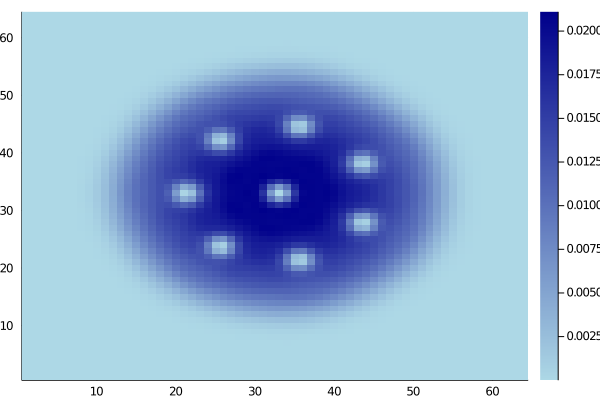

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)